<p style="text-align: center;">
  <img src="data/logo_indicium_pproduction.png" width="50%">
</p>

<h2 style="text-align: center; color: black; font-weight: bold;">
  Desafio Cientista de Dados - Programa Lighthouse - 2025-11
</h2>

Autor: Luiz Felipe da Silva\
E-mail: lf.silvafelipe@gmail.com

## 1. Introdução:
### 1.1 Contexto e Descrição do Problema  
A Indicium foi contratada por um estúdio de Hollywood, denominado PProductions, para apoiar a definição do próximo filme a ser produzido. Para esse fim, foi disponibilizado um banco de dados cinematográfico, que deve ser explorado a fim de identificar padrões e tendências relevantes, capazes de orientar a tomada de decisão do estúdio e reduzir os riscos associados a novos investimentos.  
  

---

### 1.2 Objetivo Geral  
Compreender os principais determinantes do sucesso de produções cinematográficas e desenvolver um modelo preditivo capaz de estimar a nota do IMDb com base em atributos do filme.  

---

### 1.3 Objetivos Específicos  
- Realizar uma Análise Exploratória dos Dados (EDA) para identificar padrões, distribuições e relações entre as variáveis do conjunto de dados;
- Indicar quais filmes se destacam como fortes recomendações;
- Identificar quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme;
- Desenvolver e avaliar modelo preditivo para estimar a nota IMDb a partir das suas características;
- Testar o modelo desenvolvido utilizando o filme *The Shawshank Redemption* para verificar a capacidade de previsão da nota IMDb; 

## 2. Análise Exploratória dos Dados (EDA)

### 2.1 Importação das Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2.2 Importação e Avaliação Inicial dos Dados

In [2]:
df = pd.read_csv('data/desafio_indicium_imdb.csv') #importando o conjunto de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


In [3]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


**Dicionário dos Dados**

| Nome da Variável   | Descrição                                                                 |
|--------------------|---------------------------------------------------------------------------|
| `Series_Title`     | Nome do filme.                                                           |
| `Released_Year`    | Ano de lançamento.                                                       |
| `Certificate`      | Classificação etária.                                                    |
| `Runtime`          | Tempo de duração.                                                        |
| `Genre`            | Gênero do filme.                                                         |
| `IMDB_Rating`      | Nota do IMDB.                                                            |
| `Overview`         | Sinopse ou descrição do filme.                                           |
| `Meta_score`       | Média ponderada de todas as críticas.                                    |
| `Director`         | Diretor responsável pelo filme.                                          |
| `Star1`            | Ator/atriz principal (#1).                                               |
| `Star2`            | Ator/atriz (#2).                                                         |
| `Star3`            | Ator/atriz (#3).                                                         |
| `Star4`            | Ator/atriz (#4).                                                         |
| `No_of_Votes`      | Número de votos recebidos.                                               |
| `Gross`            | Faturamento do filme.                                                    |


In [4]:
df.isnull().sum() #verificando número de nulos por coluna

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [5]:
df.duplicated().sum() #avaliando registros duplicados no conjunto de dados

0

In [6]:
df.describe().T #avaliando estatísticas do conjunto de dados

,count,mean,std,min,25%,50%,75%,max
IMDB_Rating,999.0,7.947948,0.272290,7.6,7.7,7.9,8.1,9.2
Meta_score,842.0,77.969121,12.383257,28.0,70.0,79.0,87.0,100.0
No_of_Votes,999.0,271621.422422,320912.621055,25088.0,55471.5,138356.0,373167.5,2303232.0


#### Comentários Gerais - Avaliação Inicial dos Dados  

- O conjunto de dados possui **999 linhas e 16 colunas**, abrangendo informações sobre características gerais dos filmes (título, ano, classificação indicativa, gênero, elenco, diretor), avaliações do público (*IMDb Rating* e *número de votos*), da crítica (*Meta_score*) e bilheteria (*Gross*).  
- As variáveis apresentam predominantemente dois tipos principais: **categóricas (object)** e **numéricas (int/float)**.  
- Foram identificados **valores nulos** em três colunas:  
  - *Certificate*: 101 
  - *Meta_score*: 157 
  - *Gross*: 169 
- Não foram encontrados **valores duplicados** no conjunto.  
- Em relação às **estatísticas descritivas iniciais**:  
  - *IMDb Rating*: média de 7,94, com notas concentradas entre 7,6 e 9,2.  
  - *Meta_score*: média de 77,9, variando de 28 a 100, com quartis distribuídos em torno de 70–87.  
  - *No_of_Votes*: distribuição bastante assimétrica, com média de 271 mil votos, mas variando de cerca de 25 mil até mais de 2,3 milhões.


### 2.3 Pré-processamento dos Dados 

Será feito o pré-processamento do dataset para corrigir inconsistências e deixar os dados em um formato adequado para o projeto. As principais ações previstas são:  

- Converter colunas que estão em texto para valores numéricos (*Released_Year*, *Runtime* e *Gross*).
- Padronizar variáveis categóricas para evitar diferenças de escrita ou formato (*Certificate*).
- Tratar valores nulos identificados.
- Recalcular estatísticas depois após o pré-processamento dos dados.

**Conversão das Colunas para Valores Numéricos (*Released_Year, Runtime e Gross*):**

In [7]:
df['Released_Year'].unique() #verificando os valores da coluna 'Released_Year' p/ identificar inconsistências

array(['1972', '2008', '1974', '1957', '2003', '1994', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2020',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2011', '2006', '2000', '1988', '1985', '1968',
       '1960', '1942', '1936', '1931', '2018', '2017', '2016', '2012',
       '2009', '2007', '1984', '1981', '1979', '1971', '1963', '1964',
       '1950', '1940', '2013', '2005', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1965', '1959', '1958', '1952', '1948',
       '1944', '1941', '1927', '1921', '2015', '1996', '1989', '1978',
       '1961', '1955', '1953', '1925', '1924', '1982', '1967', '1951',
       '1949', '1939', '1937', '1934', '1928', '1926', '1920', '1970',
       '1969', '1956', '1947', '1945', '1930', '1938', '1935', '1933',
       '1932', '1922', '1943', 'PG'], dtype=object)

In [8]:
df[df['Released_Year']=='PG'] #foi identificado uma str no ano de lançamento - filtrando linhas com PG na coluna 'Released_Year'

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
965,Apollo 13,PG,U,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


O ano de lançamento do filme *Apollo 13* está incorreto  no dataset. O valor substituído conforme consta no site do IMDb (https://www.imdb.com/pt/title/tt0112384/?ref_=nv_sr_srsg_0_tt_8_nm_0_in_0_q_Apollo%252013)

In [9]:
df.loc[df['Series_Title'] == 'Apollo 13', 'Released_Year'] = 1995 #correção do ano de lançamento do filme Apollo 13
df[df['Series_Title']== 'Apollo 13']

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
965,Apollo 13,1995,U,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


In [10]:
df['Released_Year'] = pd.to_numeric(df['Released_Year']) #conversão da coluna 'Released_Year' para float
df['Runtime'] = df['Runtime'].str.extract(r'(\d+)').astype(float) #conversão da coluna 'Runtime' para float
df['Gross'] = pd.to_numeric(df['Gross'].str.replace(',', ''), errors='coerce') #conversão da coluna 'Gross_num' para float
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972,A,175.0,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
1,The Dark Knight,2008,UA,152.0,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
2,The Godfather: Part II,1974,A,202.0,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
3,12 Angry Men,1957,U,96.0,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
4,The Lord of the Rings: The Return of the King,2003,U,201.0,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0


In [11]:
df.info() #avaliando os tipos de dados após a conversão

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    int64  
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    float64
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    float64
dtypes: float64(4), int64(2), object(9)
memory usage: 117.2+ KB


**Padronização das Variáveis Categóricas:**

In [12]:
df['Certificate'].value_counts() 

Certificate
U           234
A           196
UA          175
R           146
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
16            1
TV-MA         1
Unrated       1
U/A           1
Name: count, dtype: int64

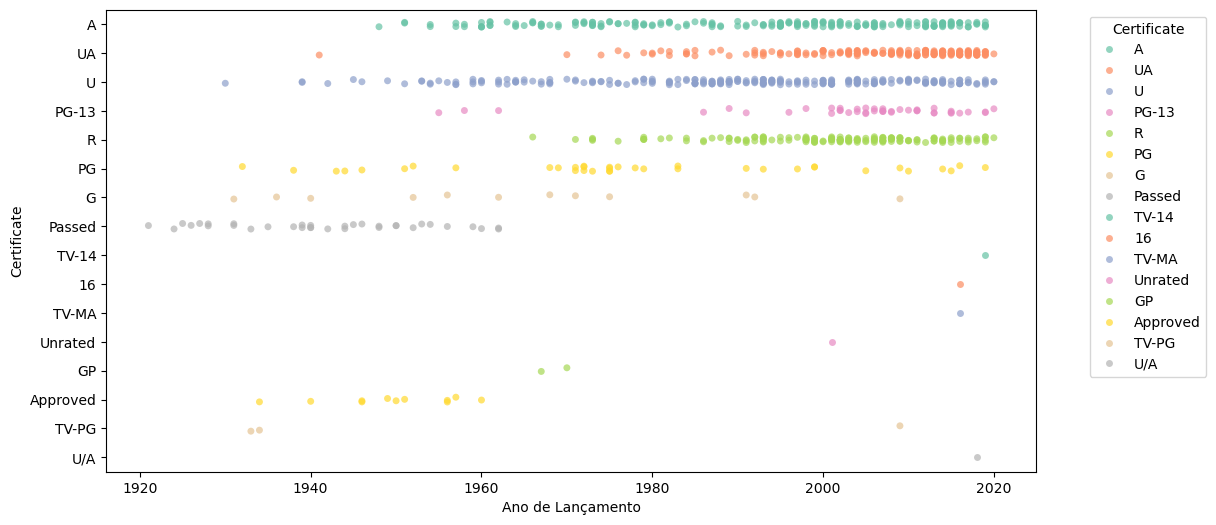

In [13]:
plt.figure(figsize=(12,6)) #avaliando se a classificação possui alguma relação com o ano de lançamento
sns.stripplot(
    data=df, 
    x='Released_Year', 
    y='Certificate', 
    hue='Certificate',
    jitter=True, 
    alpha=0.7,
    palette='Set2'
)

plt.xlabel('Ano de Lançamento')
plt.ylabel('Certificate')
plt.legend(title='Certificate', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- Classificações como *Passed* e *Approved* aparecem apenas em filmes antigos, concentrados antes de 1970.    
- Categorias como *U*, *UA* e *A* estão distribuídas em várias décadas.
- Algumas classificações são pouco frequentes, como *TV-14*, *TV-MA* e *16*.
- 1 filme não possui classificação indicativa (*Unrated*)
- Há grande variação entre os tipos de certificados.
- A coluna *Certificate* não segue um padrão específico

Buscou-se entender de onde vem esse padrão. De acordo com o IMDb (https://help.imdb.com/article/contribution/titles/certificates/GU757M8ZJ9ZPXB39?ref_=helpart_nav_27#), com base nos rótulos identificados, é possível identificar que o dataset tem rótulos de classificação indicativa de diferentes origens: 

- Índia/Malásia/Tailândia/UK: U, UA, U/A, A 
- Estados Unidos (MPAA): G, PG, PG-13, R  
- Classificações antigas dos EUA (pré-1968): Passed, Approved, GP (posteriormente substituído por PG)  
- Televisão (EUA): TV-PG, TV-14, TV-MA  
- Outros: 16, Unrated  

Em seguida, optou-se por padronizar todos os rótulos para o sistema americano (MPAA), resultando nas categorias:  
`G`, `PG`, `PG-13`, `R`, `A`, `Others` e `Unknown`.

In [14]:
classes = {
    'U': 'G',
    'G': 'G',
    'UA': 'PG',
    'U/A': 'PG',
    'PG': 'PG',
    'GP': 'PG',
    'PG-13': 'PG-13',
    'TV-14': 'PG-13',
    'R': 'R',
    '16': 'R',
    'TV-MA': 'R',
    'A': 'A',
    'Passed': 'Others',
    'Approved': 'Others',
    'Unrated': 'Others',
    'TV-PG': 'Others'
}

df['Certificate'] = df['Certificate'].replace(classes)
df['Certificate'] = df['Certificate'].fillna('Unknown')
df['Certificate'].value_counts()

Certificate
G          246
PG         215
A          196
R          148
Unknown    101
Others      49
PG-13       44
Name: count, dtype: int64

In [15]:
df.isnull().sum()

Series_Title       0
Released_Year      0
Certificate        0
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

**Tratamento de Valores Nulos**

O conjunto de dados apresentava valores ausentes nas colunas `Gross` e `Meta_score`. Pela relevância das categorias e pela baixa quantidade de dados, não seria adequado simplesmente remover os registros.

Valores nulos de `Gross` foram preenchidos pela mediana da década. Caso a década não tivesse referência, utilizou-se a mediana global. Essa escolha se justifica porque a variável apresenta distribuição fortemente assimétrica à direita, com média muito maior que a mediana, influenciada por poucos filmes com bilheteira extremamente alta. A mediana, nesse caso, representa melhor o valor típico.

Para os valores ausentes em `Meta_score`, optou-se pelo preenchimento com a mediana global da coluna. Embora a distribuição seja aproximadamente simétrica, com leve assimetria negativa e média próxima da mediana, a utilização da mediana garante consistência metodológica e evita distorções provocadas por valores atípicos.

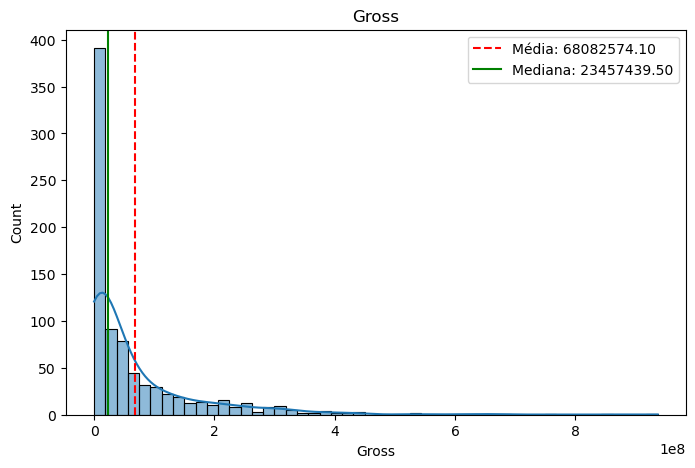

Gross
  Média: 68082574.10
  Mediana: 23457439.50
  Assimetria: 3.13



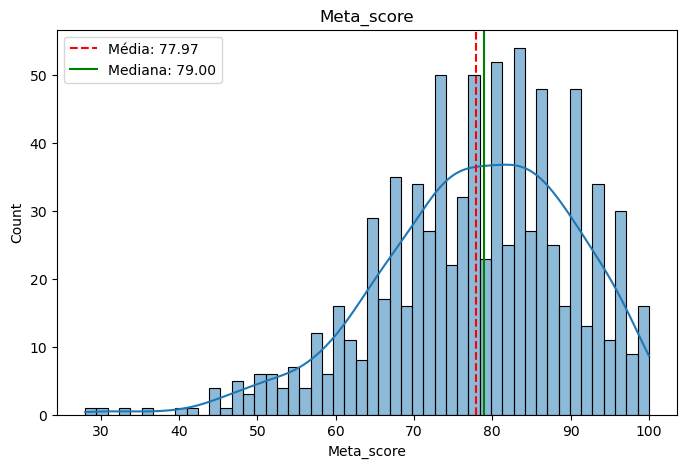

Meta_score
  Média: 77.97
  Mediana: 79.00
  Assimetria: -0.60


In [16]:
#avaliando a distribuição da coluna 'Gross'
plt.figure(figsize=(8,5))
sns.histplot(df['Gross'], bins=50, kde=True)
plt.axvline(df['Gross'].mean(), color='red', linestyle='--', label=f"Média: {df['Gross'].mean():.2f}")
plt.axvline(df['Gross'].median(), color='green', linestyle='-', label=f"Mediana: {df['Gross'].median():.2f}")
plt.title('Gross')
plt.legend()
plt.show()

print("Gross")
print(f"  Média: {df['Gross'].mean():.2f}")
print(f"  Mediana: {df['Gross'].median():.2f}")
print(f"  Assimetria: {df['Gross'].skew():.2f}")
print()

#avaliando a distribuição da coluna 'Meta_score'
plt.figure(figsize=(8,5))
sns.histplot(df['Meta_score'], bins=50, kde=True)
plt.axvline(df['Meta_score'].mean(), color='red', linestyle='--', label=f"Média: {df['Meta_score'].mean():.2f}")
plt.axvline(df['Meta_score'].median(), color='green', linestyle='-', label=f"Mediana: {df['Meta_score'].median():.2f}")
plt.title('Meta_score')
plt.legend()
plt.show()

print('Meta_score')
print(f"  Média: {df['Meta_score'].mean():.2f}")
print(f"  Mediana: {df['Meta_score'].median():.2f}")
print(f"  Assimetria: {df['Meta_score'].skew():.2f}")

In [17]:
df['Decada'] = (df['Released_Year'] // 10) * 10
df['Gross'] = df['Gross'].fillna(df.groupby('Decada')['Gross'].transform('median'))
df['Gross'] = df['Gross'].fillna(df['Gross'].median())
df = df.drop(columns=['Decada'])
df['Gross'].isna().sum()

0

In [18]:
df['Meta_score'] = df['Meta_score'].fillna(df['Meta_score'].median())
df['Meta_score'].isna().sum()

0

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    int64  
 2   Certificate    999 non-null    object 
 3   Runtime        999 non-null    float64
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     999 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          999 non-null    float64
dtypes: float64(4), int64(2), object(9)
memory usage: 117.2+ KB


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Released_Year,999.0,1.991218e+03,2.329717e+01,1920.0,1976.0,1999.0,2009.0,2020.0
Runtime,999.0,1.228719e+02,2.810123e+01,45.0,103.0,119.0,137.0,321.0
IMDB_Rating,999.0,7.947948e+00,2.722895e-01,7.6,7.7,7.9,8.1,9.2
Meta_score,999.0,7.813113e+01,1.137377e+01,28.0,72.0,79.0,85.5,100.0
No_of_Votes,999.0,2.716214e+05,3.209126e+05,25088.0,55471.5,138356.0,373167.5,2303232.0
Gross,999.0,6.000867e+07,1.017894e+08,1305.0,3990500.0,23637265.0,61576564.5,936662225.0


### 2.4 Análise Univariada

**Distribuições das Variáveis Numéricas**

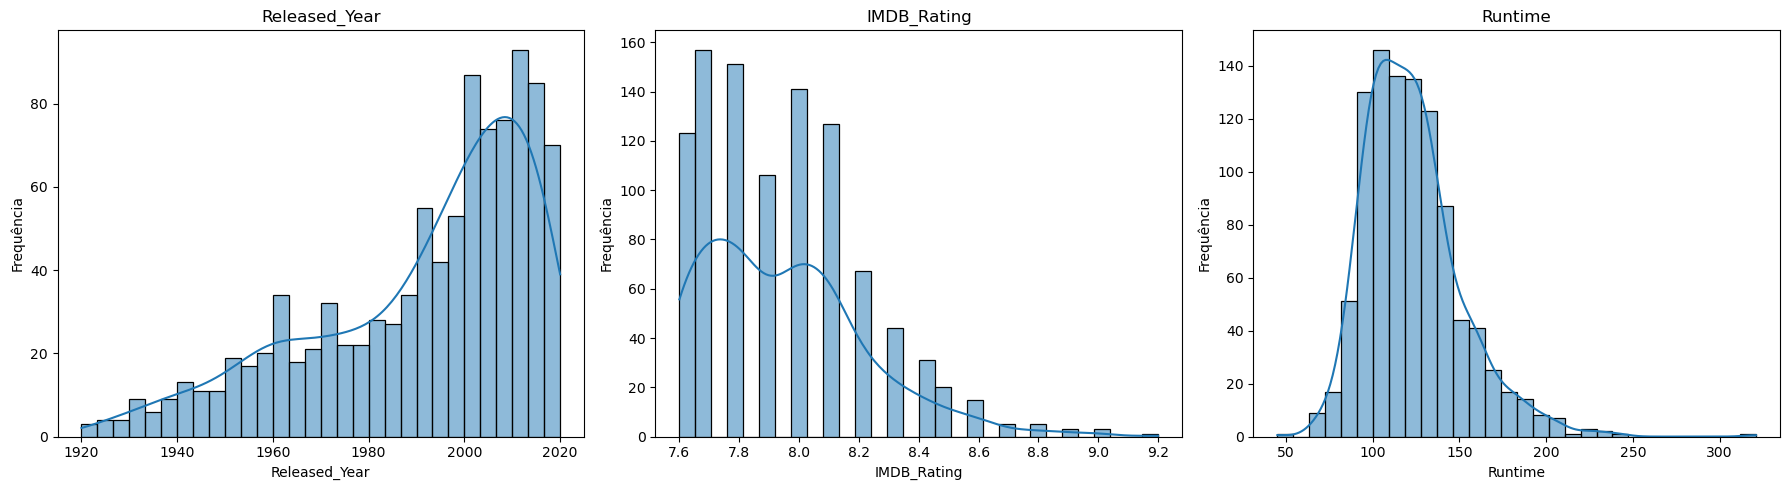

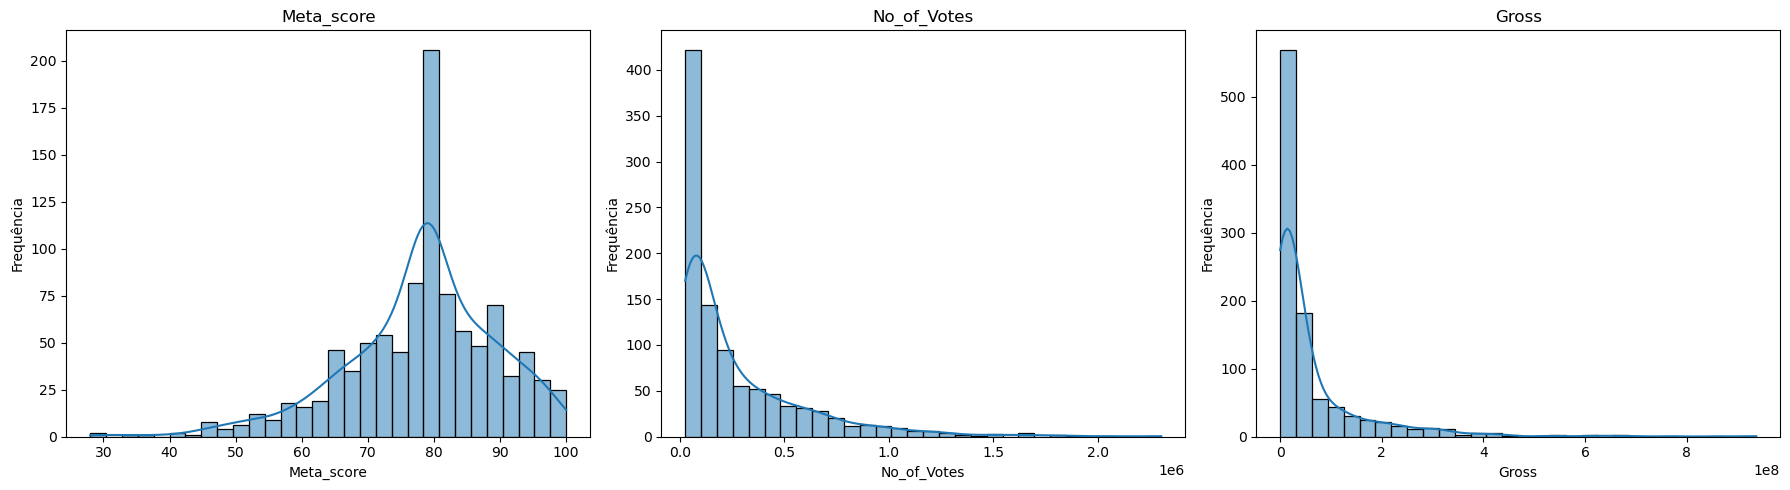

In [21]:
cols = ['Released_Year','IMDB_Rating','Runtime','Meta_score','No_of_Votes','Gross']

for i in range(0, len(cols), 3):
    fig, axes = plt.subplots(1, 3, figsize=(18,5))  # 1 linha, 3 colunas
    
    for j, col in enumerate(cols[i:i+3]):
        sns.histplot(df[col].dropna(), bins=30, kde=True, ax=axes[j])
        axes[j].set_title(f"{col}")
        axes[j].set_xlabel(col)
        axes[j].set_ylabel('Frequência')
    
    plt.tight_layout()
    plt.show()

#### Comentários Gerais - Distribuições das Variáveis Numéricas

- A maior parte dos filmes foi lançada entre os anos 1980 e 2020.
- As notas do público (IMDB_Rating) estão concentradas entre 7,5 e 8,5, com poucos filmes abaixo disso.
- A duração dos filmes (Runtime) gira em torno de 100 a 150 minutos, sendo raro encontrar obras muito curtas (< 60 min) ou muito longas (> 180 min).
- As notas da crítica (Meta_score) apresentam distribuição quase simétrica, concentrada entre 60 e 90 pontos mas com um pico na mediana (79) devido ao preenchimento dos valores ausentes por esse valor.
- O número de votos (No_of_Votes) é fortemente assimétrico à direita: a maioria dos filmes recebeu poucos votos, enquanto poucos títulos extremamente populares tiveram mais de 500 mil.
- A bilheteira (Gross) também é bastante assimétrica à direita: a maioria dos filmes arrecadou valores relativamente baixos, mas alguns blockbusters ultrapassaram centenas de milhões.

**Outliers**

Para identificar os outliers, será utilizado o método do IQR (Intervalo Interquartil).

A análise será feita nas variáveis numéricas IMDB_Rating, Meta_score, Gross, Runtime, Released_Year e No_of_Votes, com o objetivo de reconhecer os valores extremos e avaliar a necessidade de tratamento.

IMDB_Rating: 12 outliers | Limite inferior = 7.10, Limite superior = 8.70


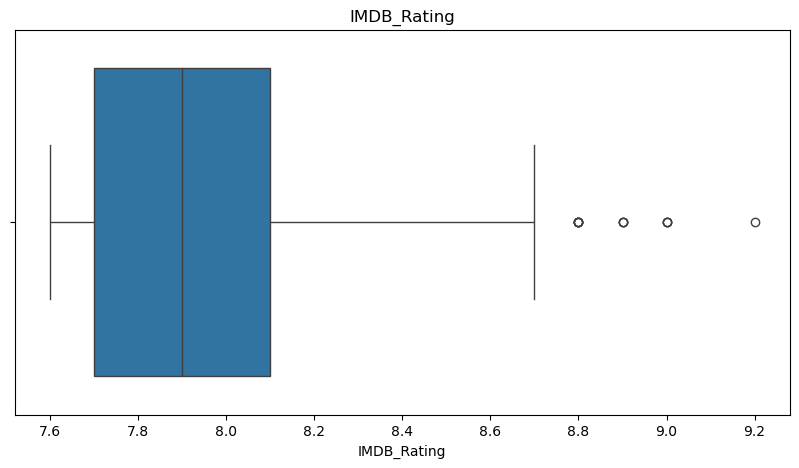

Meta_score: 25 outliers | Limite inferior = 51.75, Limite superior = 105.75


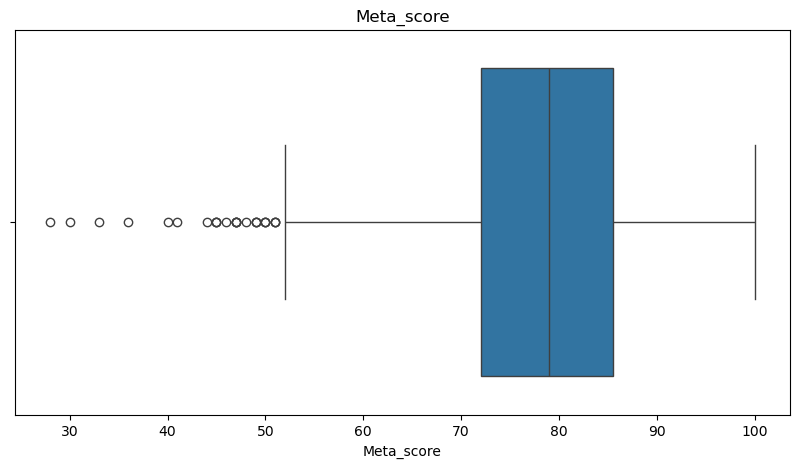

Gross: 124 outliers | Limite inferior = -82388596.75, Limite superior = 147955661.25


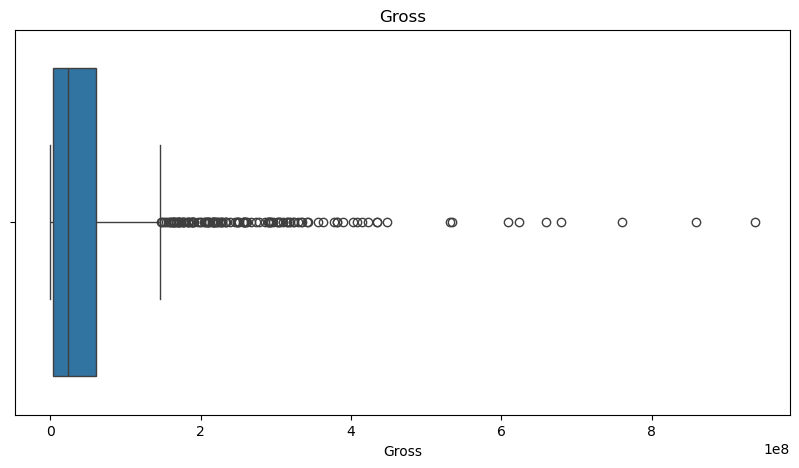

Runtime: 29 outliers | Limite inferior = 52.00, Limite superior = 188.00


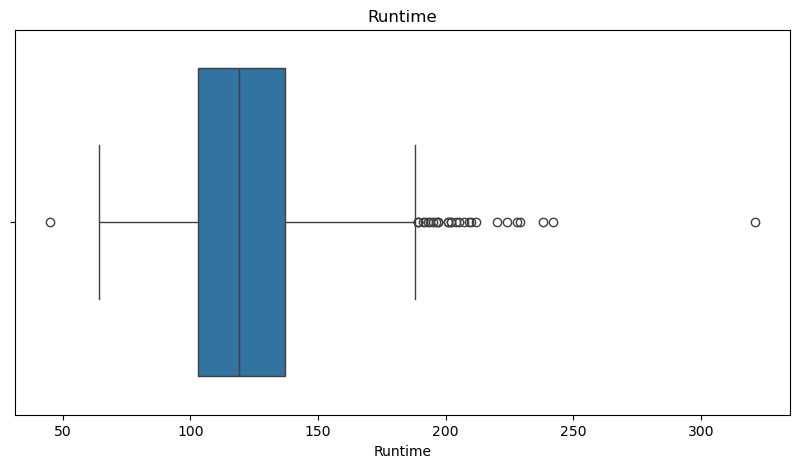

Released_Year: 7 outliers | Limite inferior = 1926.50, Limite superior = 2058.50


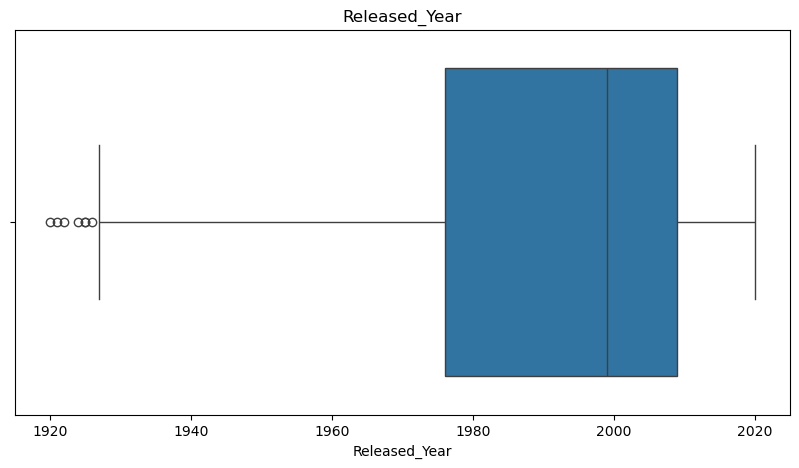

No_of_Votes: 66 outliers | Limite inferior = -421072.50, Limite superior = 849711.50


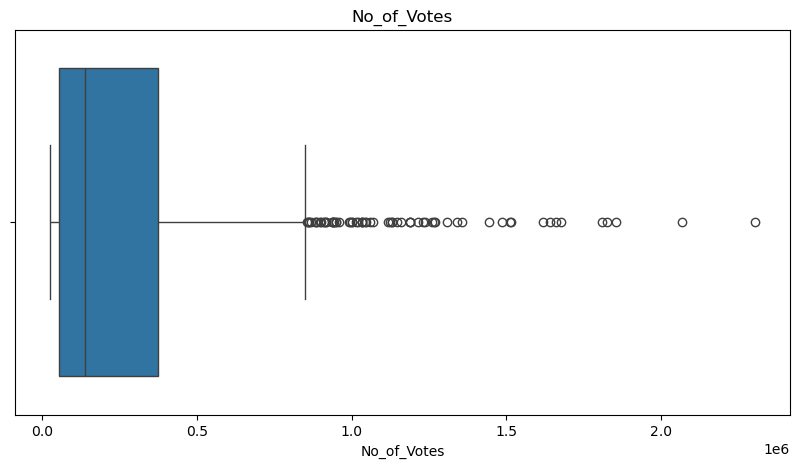

In [22]:
cols = ['IMDB_Rating', 'Meta_score', 'Gross', 'Runtime', 'Released_Year', 'No_of_Votes']

for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    print(f"{col}: {len(outliers)} outliers | Limite inferior = {Q1 - 1.5*IQR:.2f}, Limite superior = {Q3 + 1.5*IQR:.2f}")

    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f'{col}')
    plt.show()

Foram encontrados outliers em várias variáveis numéricas, principalmente em Gross e No_of_Votes. Esses valores correspondem a filmes com bilheteria muito alta ou com grande número de votos, ou seja, casos reais e esperados. Por isso, optou-se por não removê-los.


**Distribuições das Variáveis Categóricas**

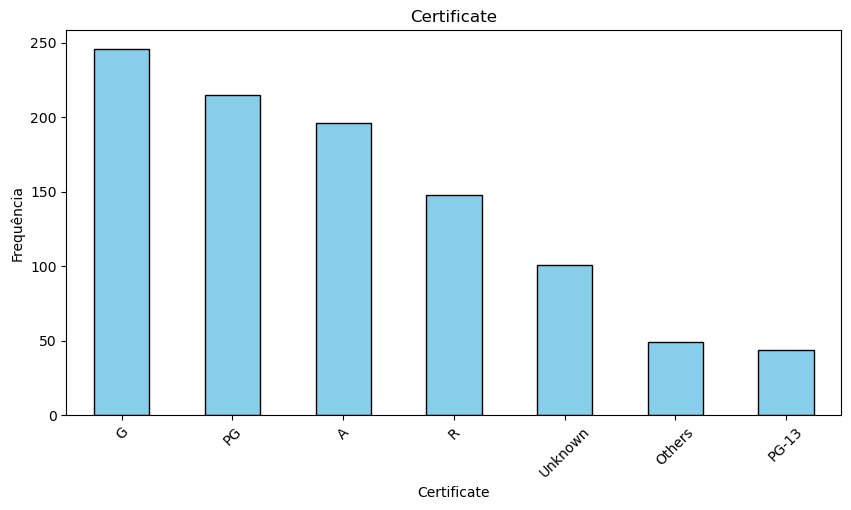

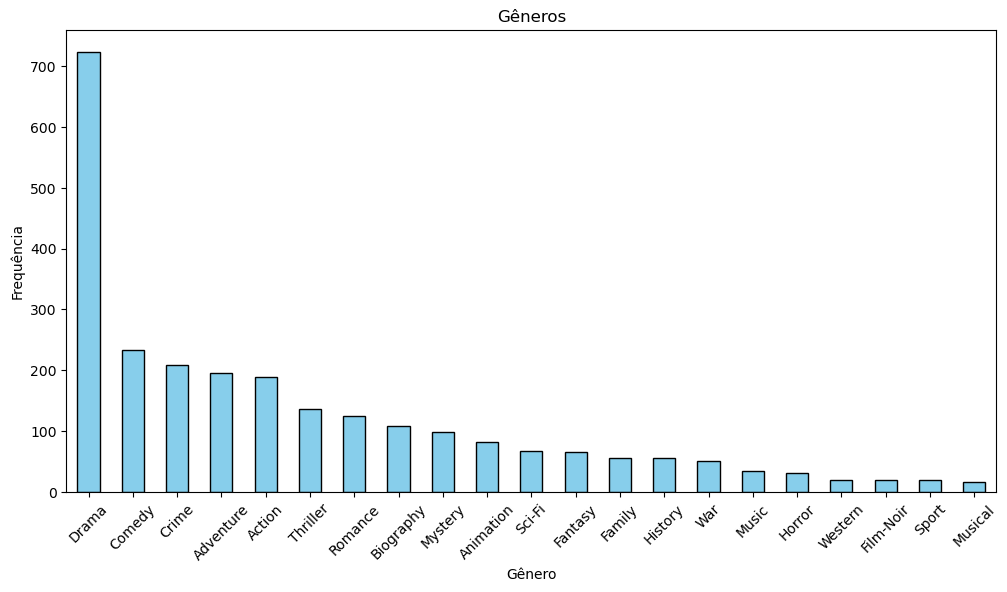

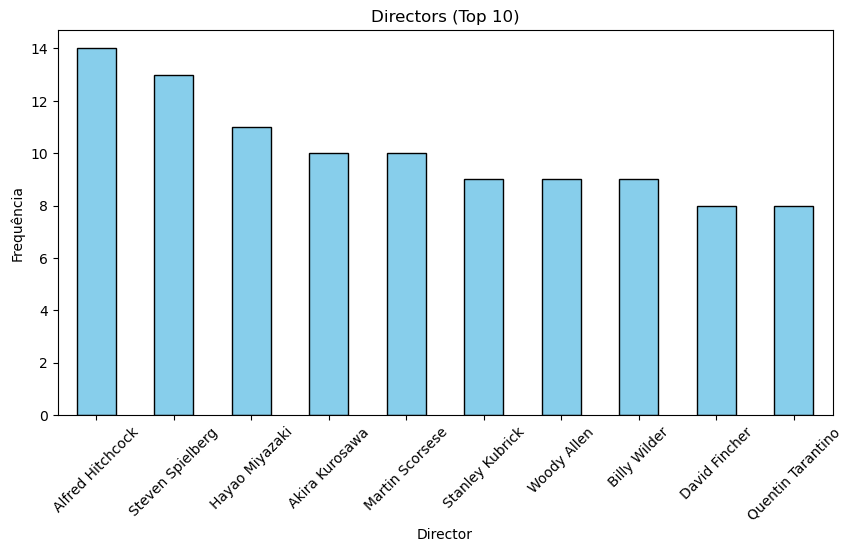

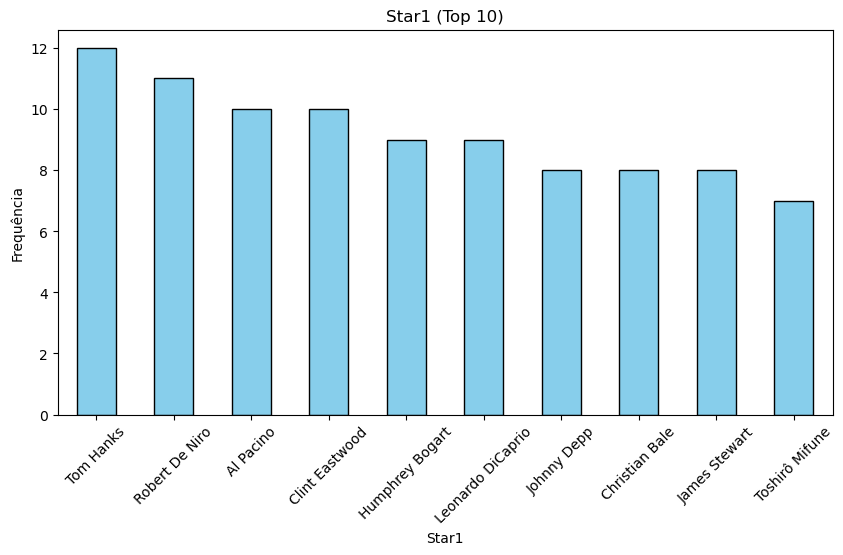

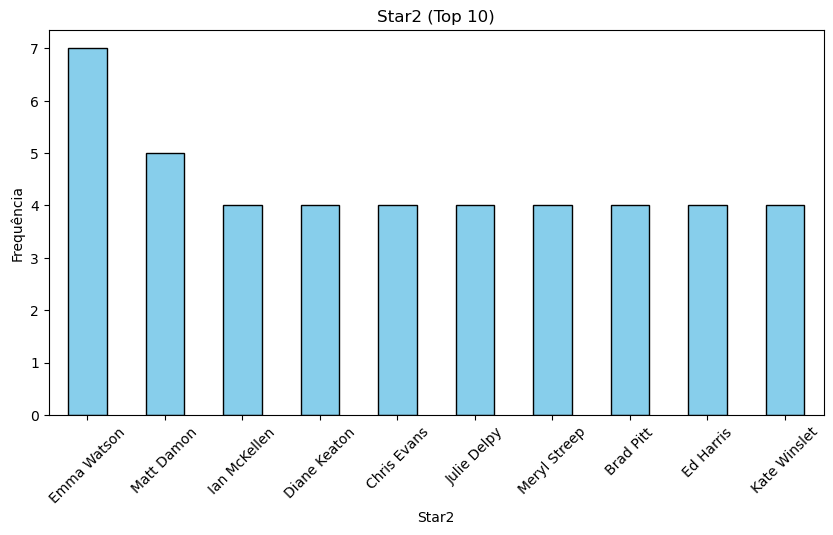

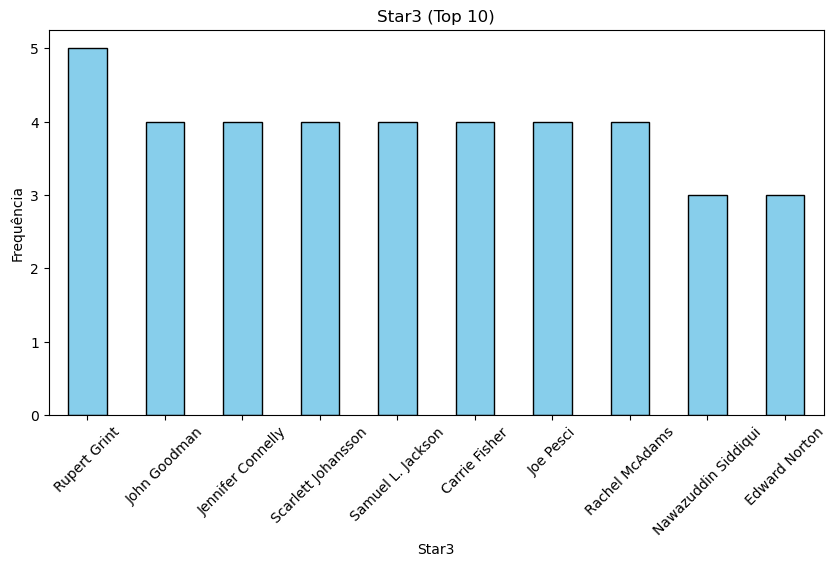

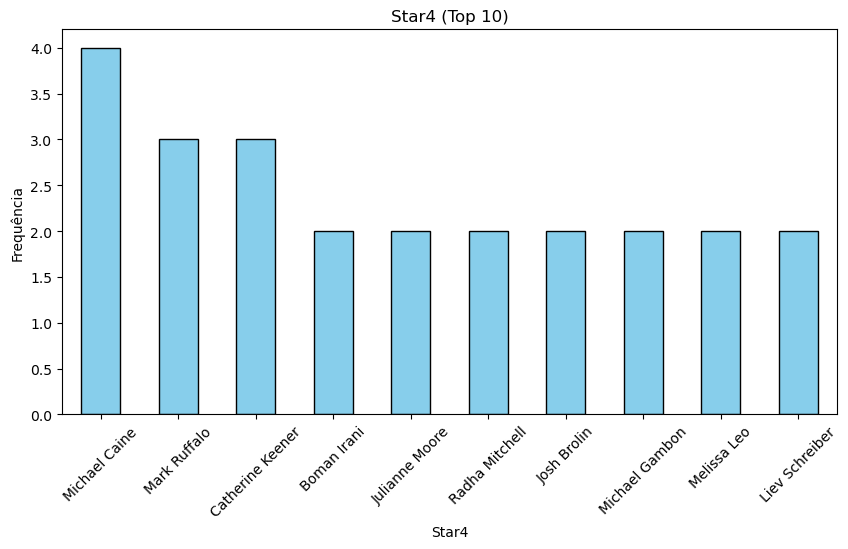

In [23]:
# Certificate
plt.figure(figsize=(10,5))
df['Certificate'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Certificate')
plt.xlabel('Certificate')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

# Genre
df_exploded = df.assign(Genre=df['Genre'].str.split(',')).explode('Genre')
df_exploded['Genre'] = df_exploded['Genre'].str.strip()

plt.figure(figsize=(12,6))
df_exploded['Genre'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Gêneros')
plt.xlabel('Gênero')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

# Directors (Top 10)
plt.figure(figsize=(10,5))
df['Director'].value_counts().nlargest(10).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Directors (Top 10)')
plt.xlabel('Director')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

# Stars (Top 10 para cada coluna)
for col in ['Star1', 'Star2', 'Star3', 'Star4']:
    plt.figure(figsize=(10,5))
    df[col].value_counts().nlargest(10).plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'{col} (Top 10)')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.xticks(rotation=45)
    plt.show()



### Comentários Gerais - Distribuições das Variáveis Categóricas

- **Certificate**: a maior parte dos filmes foi classificada como `G` (livre), seguida de `PG` e `A`.
- **Genre**: `Drama` domina amplamente como gênero mais recorrente, seguido por `Comedy`, `Crime`, `Adventure` e `Action`. Gêneros como `Film-Noir`, `Sport`, `Musical` e `Western` são pouco representados, indicando baixa frequência na base.  
- **Director**: diretores como Alfred Hitchcock, Steven Spielberg, Hayao Miyazaki e Akira Kurosawa se destacam entre os mais frequentes. 
- **Star1**: atores principais mais recorrentes incluem Tom Hanks, Robert De Niro, Al Pacino, Clint Eastwood e Leonardo DiCaprio.
- **Star2**: Emma Watson, Matt Damon, Ian McKellen e Meryl Streep aparecem em destaque.
- **Star3**: Rupert Grint, Scarlett Johansson, Samuel L. Jackson e Jennifer Connelly são alguns dos mais frequentes nesta posição.
- **Star4**: Michael Caine lidera os registros de quarta posição, seguido por Mark Ruffalo, Catherine Keener

### 2.5 Análise Bivariada e Multivariada

A matriz de correlação será usada para verificar se existe alguma relação linear entre as variáveis do conjunto de dados. Primeiramente, o foco é observar como as variáveis se relacionam com a variável-alvo IMDB_Rating e entender a força e o sentido dessas relações.

**IMDb e as Variáveis Numéricas**

In [24]:
corr_matrix = df.corr(numeric_only=True)

In [25]:
corr_target = corr_matrix['IMDB_Rating'].sort_values(ascending=False)
print(corr_target)

IMDB_Rating      1.000000
No_of_Votes      0.479308
Meta_score       0.261010
Runtime          0.242751
Gross            0.088621
Released_Year   -0.133355
Name: IMDB_Rating, dtype: float64


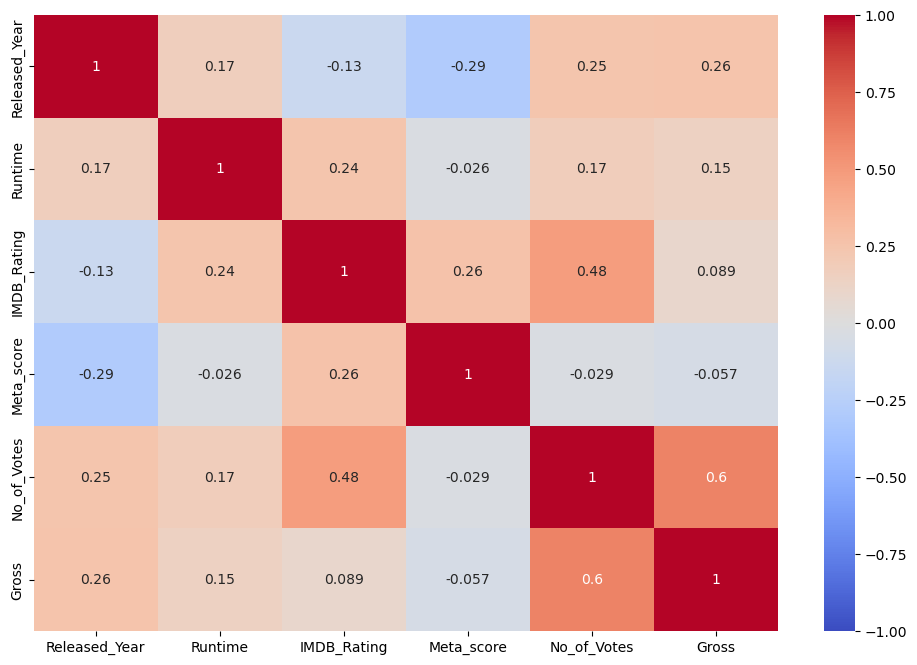

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.show()

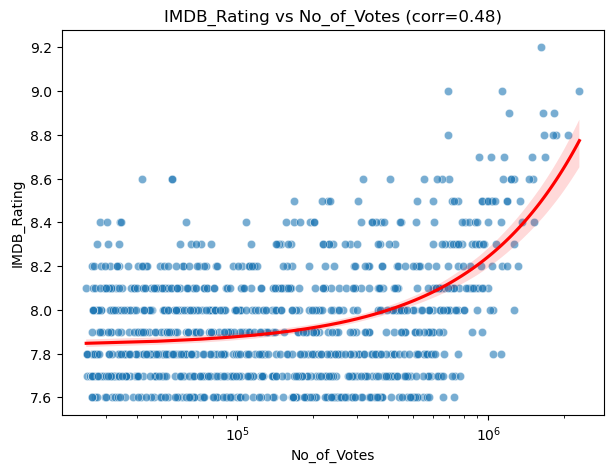

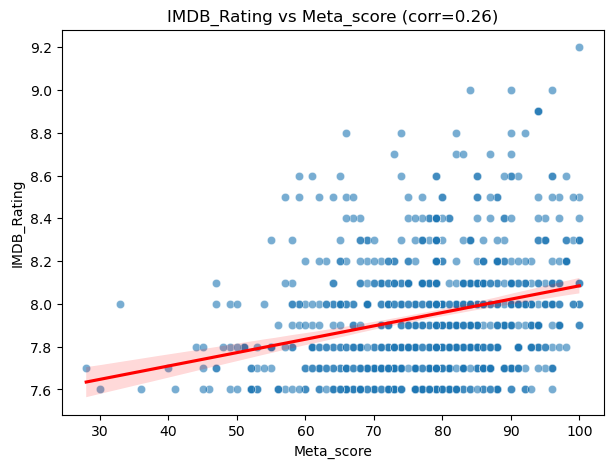

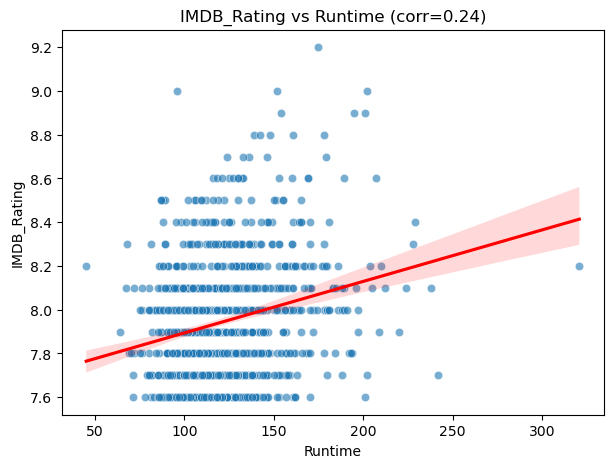

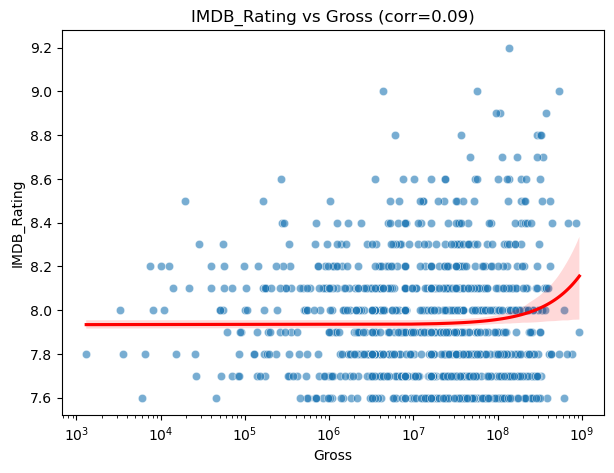

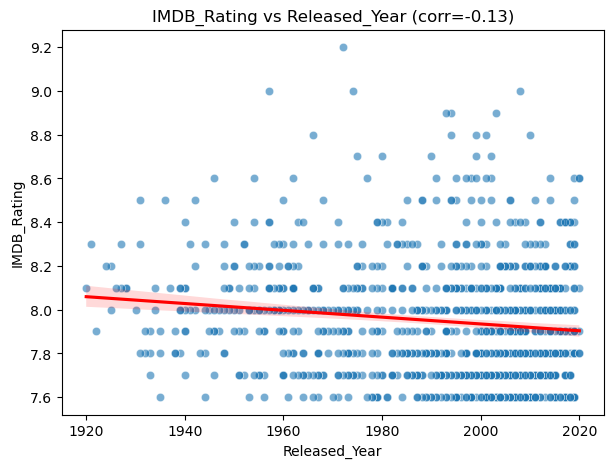

In [27]:
def plot_corr_scatter(df, target, cols, log_scale=None):
    for col in cols:
        corr = df[[target, col]].corr().iloc[0,1]
        plt.figure(figsize=(7,5))
        sns.scatterplot(data=df, x=col, y=target, alpha=0.6)
        sns.regplot(data=df, x=col, y=target,
                    scatter=False, color='red')
        if log_scale and col in log_scale:
            plt.xscale('log')
        plt.title(f'{target} vs {col} (corr={corr:.2f})')
        plt.xlabel(col)
        plt.ylabel(target)
        plt.show()

num_cols = ['No_of_Votes','Meta_score','Runtime','Gross','Released_Year']
plot_corr_scatter(df, target='IMDB_Rating', cols=num_cols, log_scale=['No_of_Votes','Gross'])

#### Comentários Gerais – Variáveis Numéricas e o IMDB_Rating

A análise conjunta da **matriz de correlação** e dos **gráficos de dispersão** mostra como a variável-alvo `IMDB_Rating` se relaciona com as demais variáveis numéricas:

- **Número de votos (`No_of_Votes`)**  
  É a variável mais correlacionada com o `IMDB_Rating` (**0.48**). Os gráficos confirmam que filmes com maior número de votos tendem a concentrar notas mais altas, embora haja dispersão. Isso indica que a popularidade do filme contribui para avaliações melhores no IMDb.  

- **Meta_score**  
  Apresenta correlação positiva moderada (**0.26**). Visualmente, observa-se que filmes com notas críticas mais altas também recebem, em parte, boas avaliações do público, ainda que existam exceções.  

- **Tempo de duração (`Runtime`)**  
  Correlação positiva fraca (**0.24**). O padrão visual sugere que filmes com maior duração tendem levemente a ter notas mais altas, mas sem uma relação linear clara. A dispersão indica que esse fator, sozinho, não explica o `IMDB_Rating`.  

- **Bilheteira (`Gross`)**  
  Correlação muito baixa (**0.09**). Os gráficos mostram grande dispersão: filmes que arrecadam muito podem ter tanto notas altas quanto medianas, o que reforça que sucesso comercial não implica em melhor avaliação crítica do público.  

- **Ano de lançamento (`Released_Year`)**  
  Correlação negativa fraca (**-0.13**). O padrão indica que produções mais antigas tendem a apresentar notas ligeiramente superiores em relação a filmes mais recentes. Isso pode refletir tanto o prestígio de clássicos quanto mudanças na forma como o público avalia.

**IMDb e as Variáveis Categóricas**

In [28]:
media_genero = g.groupby('Genre')['IMDB_Rating'].mean().sort_values(ascending=False)

print(media_genero.head(15))

plt.figure(figsize=(10,4))
sns.barplot(
    x=media_genero.index,
    y=media_genero.values,
    hue=media_genero.index,
    palette='viridis',
    legend=False
)
plt.xticks(rotation=45, ha='right')
plt.title('Nota média do IMDB por gênero')
plt.ylabel('Média IMDB_Rating')
plt.xlabel('Gênero')
plt.tight_layout()
plt.show()

NameError: name 'g' is not defined

In [ ]:
g = df[['Series_Title','IMDB_Rating','Genre']].dropna()
g['Genre'] = g['Genre'].str.split(r'[|,/]')
g = g.explode('Genre')
g['Genre'] = g['Genre'].str.strip()

g['_one'] = 1
g_wide = g.pivot_table(index='Series_Title',
                       columns='Genre',
                       values='_one',
                       aggfunc='max').fillna(0)

ratings = df.drop_duplicates('Series_Title').set_index('Series_Title')['IMDB_Rating']
mat = g_wide.join(ratings, how='inner')

corr_genre = mat.corr()['IMDB_Rating'].drop('IMDB_Rating').sort_values(ascending=False)

print(corr_genre.head(15))

plt.figure(figsize=(10,5))
sns.barplot(
    x=corr_genre.head(15).index,
    y=corr_genre.head(15).values,
    hue=corr_genre.head(15).index,
    palette="viridis",
    legend=False
)
plt.title('Correlação IMDB_Rating × Gêneros')
plt.xlabel('Gênero')
plt.ylabel('Correlação')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
base = df[['Director','IMDB_Rating','Series_Title']].dropna()

grp = (base.groupby('Director')
            .agg(qtd_filmes=('Series_Title','nunique'),
                 media_nota=('IMDB_Rating','mean'))
            .sort_values('media_nota', ascending=False))

grp_f = grp.query('qtd_filmes >= 3')

top_n = 10
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

g1 = grp_f.head(top_n)
sns.barplot(ax=axes[0], x='media_nota', y=g1.index, data=g1, color='skyblue')
axes[0].set_title(f'Top {top_n} Diretores por Média (IMDB_Rating)')
axes[0].set_xlabel('Média IMDB_Rating')
axes[0].set_ylabel('Diretor')

g2 = grp_f.tail(top_n)
sns.barplot(ax=axes[1], x='media_nota', y=g2.index, data=g2, color='salmon')
axes[1].set_title(f'Bottom {top_n} Diretores por Média (IMDB_Rating)')
axes[1].set_xlabel('Média IMDB_Rating')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
col_cert = 'Certificate' if 'Certificate' in df.columns else 'Rated'

media_cert = (df.dropna(subset=[col_cert, 'IMDB_Rating'])
                .groupby(col_cert)['IMDB_Rating']
                .mean()
                .sort_values(ascending=False))

print(media_cert)

plt.figure(figsize=(10,5))
sns.barplot(
    x=media_cert.index,
    y=media_cert.values,
    hue=media_cert.index,
    palette="viridis",
    legend=False
)
plt.title('Nota média do IMDB por classificação indicativa')
plt.xlabel('Classificação')
plt.ylabel('Média IMDB_Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
c = df[['Series_Title', col_cert, 'IMDB_Rating']].dropna().copy()
c['_one'] = 1

c_wide = c.pivot_table(index='Series_Title',
                       columns=col_cert,
                       values='_one',
                       aggfunc='max').fillna(0)

ratings = df.drop_duplicates('Series_Title').set_index('Series_Title')['IMDB_Rating']
mat = c_wide.join(ratings, how='inner')

corr_cert_imdb = mat.corr()['IMDB_Rating'].drop('IMDB_Rating').sort_values(ascending=False)

print(corr_cert_imdb)

plt.figure(figsize=(8,5))
sns.barplot(
    x=corr_cert_imdb.index,
    y=corr_cert_imdb.values,
    hue=corr_cert_imdb.index,
    palette="viridis",
    legend=False
)
plt.title('Correlação Classificação Indicativa × IMDB_Rating')
plt.xlabel('Classificação')
plt.ylabel('Correlação com IMDB_Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Comentários Gerais – Relação das Variáveis Categóricas e o IMDB_Rating

A análise combinando correlações e médias mostra como o `IMDB_Rating` varia em função dos **gêneros**, **diretores** e **classificação** dos filmes.

#### Gêneros
- **Médias de nota**: os gêneros com maiores médias de avaliação foram **War**, **Western**, **Film-Noir** e **Sci-Fi**.
- **Correlação**: o gênero **Drama** apresentou a maior correlação positiva com o `IMDB_Rating` reforçando seu papel em avaliações mais altas. Outros gêneros como **War**, **Sci-Fi** e **Western** também mostraram correlações positivas. Por outro lado, gêneros como **Animation** e **Fantasy** apresentaram correlaçõe negativas, sugerindo que a simples presença desses gêneros não garante notas elevadas.

#### Diretores
- Considerando apenas diretores com pelo menos **3 filmes** no dataset, os destaques positivos foram **Christopher Nolan, Francis Ford Coppola, Peter Jackson, Charles Chaplin, Sergio Leone, Stanley Kubrick, Akira Kurosawa, Frank Capra, Quentin Tarantino e Rajkumar Hirani**, todos figurando no **Top 10** por média de avaliação, com notas acima de 8 no IMDb.  
- No lado oposto, entre os **Bottom 10**, aparecem nomes como **Ang Lee, Fred Zinnemann, Terrence Malick, John Hughes, Andrey Zvyagintsev, Jim Jarmusch, Ron Clements, Spike Lee, Don Siegel e Matthew Vaughn**, com médias mais baixas, próximas a 7.0.

#### Classificação Indicativa
- **Médias de nota**: as maiores foram observadas em categorias **Others, A e G**, todas próximas de 8.0. Já filmes classificados como **R** e **PG-13** tiveram médias mais baixas, em torno de 7.8.  
- **Correlação**: as categorias **A** e **G** apresentaram correlação positiva com as notas, enquanto **PG-13** e **R** mostraram correlação negativa (até -0.11), sugerindo que essas classificações tendem a estar associadas a avaliações ligeiramente inferiores.

**Gross e as Variáveis Numéricas**

In [ ]:
corr_target = corr_matrix['Gross'].sort_values(ascending=False)
print(corr_target)

In [ ]:
def plot_corr_scatter(df, target, cols, log_scale=None):
    for col in cols:
        corr = df[[target, col]].corr().iloc[0,1]
        plt.figure(figsize=(7,5))
        sns.scatterplot(data=df, x=col, y=target, alpha=0.6)
        sns.regplot(data=df, x=col, y=target,
                    scatter=False, color='red')
        if log_scale and col in log_scale:
            plt.xscale('log')
        plt.title(f'{target} vs {col} (corr={corr:.2f})')
        plt.xlabel(col)
        plt.ylabel(target)
        plt.show()

num_cols = ['No_of_Votes','Meta_score','Runtime','Released_Year','IMDB_Rating']
plot_corr_scatter(df, target='Gross', cols=num_cols, log_scale=['No_of_Votes','Gross'])


### Comentários Gerais – Relação das Variáveis Numéricas com o Gross

A análise de correlação e dispersão mostra como o `Gross` (bilheteira) varia em função das variáveis numéricas do conjunto de dados.

#### Número de votos (`No_of_Votes`)
- Apresenta a correlação mais alta com o `Gross` (0.60).
- Filmes mais votados pelo público tendem a ter maior arrecadação.
- O padrão de dispersão sugere relação crescente e não linear: à medida que o número de votos cresce, a bilheteira se amplia significativamente.

#### Ano de lançamento (`Released_Year`)
- Correlação positiva moderada (0.26).
- Filmes mais recentes, em média, têm maior bilheteira, possivelmente refletindo inflação, aumento da indústria e expansão do mercado global.

#### Duração (`Runtime`)
- Correlação positiva fraca (0.15).
- Filmes mais longos tendem a arrecadar um pouco mais, mas o efeito é limitado e pouco expressivo.

#### IMDB_Rating
- Correlação muito baixa (0.09).
- Indica que notas mais altas no IMDb não garantem maior bilheteira. Há filmes bem avaliados que arrecadam pouco, assim como blockbusters com notas medianas.

#### Meta_score
- Correlação levemente negativa (-0.06).
- Sugere que a avaliação da crítica não tem relação clara com a bilheteira e pode até se contrapor em alguns casos: sucesso de público nem sempre coincide com aclamação crítica.

**Gross e Variáveis Categóricas**

In [ ]:
g = df[['Series_Title','Gross','Genre']].dropna().copy()
g['Genre'] = g['Genre'].str.split(r'[|,/]')
g = g.explode('Genre')
g['Genre'] = g['Genre'].str.strip()

media_gross = g.groupby('Genre')['Gross'].mean().sort_values(ascending=False)

print(media_gross.head(15))

plt.figure(figsize=(10,5))
sns.barplot(
    x=media_gross.values,
    y=media_gross.index,
    hue=media_gross.index,   # evita warning do seaborn
    palette="viridis",
    legend=False
)
plt.title('Gross médio por gênero')
plt.xlabel('Gross médio')
plt.ylabel('Gênero')
plt.tight_layout()
plt.show()

In [ ]:
g = df[['Series_Title','Gross','Genre']].dropna().copy()
g['Genre'] = g['Genre'].str.split(r'[|,/]')
g = g.explode('Genre')
g['Genre'] = g['Genre'].str.strip()

g['_one'] = 1
g_wide = g.pivot_table(index='Series_Title',
                       columns='Genre',
                       values='_one',
                       aggfunc='max').fillna(0)

gross = df.drop_duplicates('Series_Title').set_index('Series_Title')['Gross']

mat = g_wide.join(gross, how='inner')

corr_genre_gross = mat.corr()['Gross'].drop('Gross').sort_values(ascending=False)

print(corr_genre_gross.head(15))

plt.figure(figsize=(10,5))
sns.barplot(
    x=corr_genre_gross.values,
    y=corr_genre_gross.index,
    hue=corr_genre_gross.index,
    palette="viridis",
    legend=False
)
plt.title('Correlação entre Gêneros e Gross')
plt.xlabel('Correlação com Gross')
plt.ylabel('Gênero')
plt.tight_layout()
plt.show()


In [ ]:
grp = (df.dropna(subset=['Director','Gross'])
         .groupby('Director')
         .agg(qtd_filmes=('Series_Title','nunique'),
              media_gross=('Gross','mean'))
         .query('qtd_filmes >= 3')
         .sort_values('media_gross', ascending=False))

top_n = 10
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

g1 = grp.head(top_n)
sns.barplot(ax=axes[0],
            x='media_gross', y=g1.index,
            data=g1, color='skyblue')
axes[0].set_title(f'Top {top_n} Diretores por Gross médio')
axes[0].set_xlabel('Gross médio')
axes[0].set_ylabel('Diretor')

g2 = grp.tail(top_n).sort_values('media_gross', ascending=False)
sns.barplot(ax=axes[1],
            x='media_gross', y=g2.index,
            data=g2, color='salmon')
axes[1].set_title(f'Bottom {top_n} Diretores por Gross médio')
axes[1].set_xlabel('Gross médio')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
# escolher a coluna correta (ajuste se sua base usar outro nome)
col_cert = 'Certificate' if 'Certificate' in df.columns else 'Rated'

# calcular média de bilheteira por classificação
media_cert = (df.dropna(subset=[col_cert, 'Gross'])
                .groupby(col_cert)['Gross']
                .mean()
                .sort_values(ascending=False))

print(media_cert)

# gráfico
plt.figure(figsize=(10,5))
sns.barplot(
    x=media_cert.index,
    y=media_cert.values,
    hue=media_cert.index,
    palette="viridis",
    legend=False
)
plt.title('Gross médio por classificação indicativa')
plt.xlabel('Classificação indicativa')
plt.ylabel('Gross médio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
col_cert = 'Certificate' if 'Certificate' in df.columns else 'Rated'

c = df[['Series_Title', col_cert, 'Gross']].dropna().copy()
c['_one'] = 1

c_wide = c.pivot_table(index='Series_Title',
                       columns=col_cert,
                       values='_one',
                       aggfunc='max').fillna(0)

gross = df.drop_duplicates('Series_Title').set_index('Series_Title')['Gross']

mat = c_wide.join(gross, how='inner')

corr_cert_gross = mat.corr()['Gross'].drop('Gross').sort_values(ascending=False)

print(corr_cert_gross)

plt.figure(figsize=(8,5))
sns.barplot(
    x=corr_cert_gross.index,
    y=corr_cert_gross.values,
    hue=corr_cert_gross.index,
    palette="viridis",
    legend=False
)
plt.title('Correlação Classificação Indicativa × Gross')
plt.xlabel('Classificação')
plt.ylabel('Correlação com Gross')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Comentários Gerais – Relação das Variáveis Categóricas com o Gross

A análise de médias e correlações mostra como o `Gross` (bilheteira) varia em função dos **gêneros**, **diretores** e **classificação indicativa** dos filmes.

#### Gêneros
- **Média de Gross**: os maiores valores médios de bilheteira foram observados em **Adventure, Sci-Fi, Action e Animation**, todos superando 100 milhões.  
- **Correlação**: gêneros como **Adventure (0.42), Action (0.28) e Sci-Fi (0.20)** tiveram correlação positiva mais forte com o `Gross`, indicando associação com maiores bilheteiras. Já **Drama, Crime e Romance** apresentaram correlação negativa, sugerindo que filmes desses gêneros arrecadam menos em média.

#### Diretores
- **Top 10**: nomes como **Anthony Russo, J.J. Abrams, James Cameron, David Yates e Peter Jackson** lideram em média de bilheteira, com valores superiores a 300 milhões.  
- **Bottom 10**: diretores como **Andrey Zvyagintsev, Satoshi Kon e Emir Kusturica** figuram entre os que apresentam menores médias, muitas vezes abaixo de 5 milhões.

#### Classificação Indicativa
- **Média de Gross**: a maior média foi observada em filmes **PG** (105 milhões), seguidos de **G** (76 milhões) e **A** (~60 milhões). Filmes **R** e **Unknown** aparecem na faixa mais baixa.  
- **Correlação**: a categoria **PG** mostrou correlação positiva mais clara com `Gross` (~0.23), enquanto **R** e **Unknown** tiveram correlação negativa, reforçando que filmes com classificação mais restritiva tendem a ter arrecadação menor.

### 2.6 Resposta às Questões 2a, 2b e 2c

#### 2a.	Qual filme você recomendaria para uma pessoa que você não conhece?

In [29]:
top_filmes = (df[['Series_Title','IMDB_Rating','No_of_Votes','Gross','Genre','Director']]
              .dropna(subset=['IMDB_Rating','No_of_Votes'])
              .sort_values(['IMDB_Rating','No_of_Votes','Gross'], ascending=[False, False, False])
              .head(10))

print(top_filmes.to_markdown(index=True, tablefmt="github"))

|    | Series_Title                                  |   IMDB_Rating |   No_of_Votes |       Gross | Genre                     | Director             |
|----|-----------------------------------------------|---------------|---------------|-------------|---------------------------|----------------------|
|  0 | The Godfather                                 |           9.2 |       1620367 | 1.34966e+08 | Crime, Drama              | Francis Ford Coppola |
|  1 | The Dark Knight                               |           9   |       2303232 | 5.34858e+08 | Action, Crime, Drama      | Christopher Nolan    |
|  2 | The Godfather: Part II                        |           9   |       1129952 | 5.73e+07    | Crime, Drama              | Francis Ford Coppola |
|  3 | 12 Angry Men                                  |           9   |        689845 | 4.36e+06    | Crime, Drama              | Sidney Lumet         |
|  5 | Pulp Fiction                                  |           8.9 |       1826188 | 1

A análise do dataset mostra os **10 filmes mais recomendáveis** considerando nota do IMDb, número de votos e faturamento. A lista inclui *The Godfather*, *The Dark Knight*, *Pulp Fiction*, *Schindler's List* e *Forrest Gump*.

Entre eles, o destaque é **The Dark Knight (2008)**, por três razões principais:  
- Possui **mais de 2,3 milhões de votos**, o que o torna o filme mais amplamente avaliado da lista.  
- Tem uma **nota de 9.0 no IMDb**, que o coloca entre as produções mais bem avaliadas de todos os tempos.  
- Sua bilheteira ultrapassa os **500 milhões de dólares**, reforçando o enorme alcance e impacto cultural.  

Portanto, se fosse necessário recomendar apenas um filme para alguém cujo gosto específico não conheço, eu escolheria **The Dark Knight (2008)**.

#### 2b.	Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme? 

Com base na análise exploratória dos dados (EDA), os principais fatores relacionados ao faturamento (`Gross`) são:

- **Número de votos (`No_of_Votes`)**: apresentou a correlação mais alta com o faturamento (≈0.60). Isso indica que filmes amplamente assistidos e avaliados pelo público tendem a gerar maior receita de bilheteira.  
- **Gênero**: gêneros como **Adventure, Action e Sci-Fi** se destacaram com maiores correlações positivas com a bilheteira, sendo os mais comuns em grandes franquias e blockbusters.  
- **Diretores**: nomes associados a produções de grande orçamento e franquias de sucesso, como **Anthony Russo, J.J. Abrams e James Cameron**, lideram em média de faturamento.  
- **Classificação indicativa**: filmes com classificação mais ampla, como **PG e G**, apresentam as maiores bilheteiras médias. Já categorias mais restritivas, como **R**, tendem a limitar o alcance e reduzir o faturamento.

#### 2c.	Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?

A coluna `Overview` reúne descrições curtas das tramas de cada filme. Para verificar se esse texto pode ajudar a **entender padrões narrativos e até inferir gêneros**, foram realizadas análises de frequência de palavras.

#### Etapas realizadas
1. **Pré-processamento**: a coluna `Genre` foi separada em múltiplas categorias e identificaram-se os **cinco gêneros mais frequentes** no dataset.  
2. **Agrupamento**: para cada um desses gêneros, os resumos (`Overview`) dos filmes correspondentes foram concatenados em um único texto.  
3. **Geração de nuvens de palavras (WordClouds)**: foram criadas nuvens de palavras específicas para cada gênero, removendo *stopwords* (artigos, preposições e palavras irrelevantes).  
4. **Visualização comparativa**: os resultados foram exibidos lado a lado, permitindo observar diferenças de vocabulário entre os gêneros.

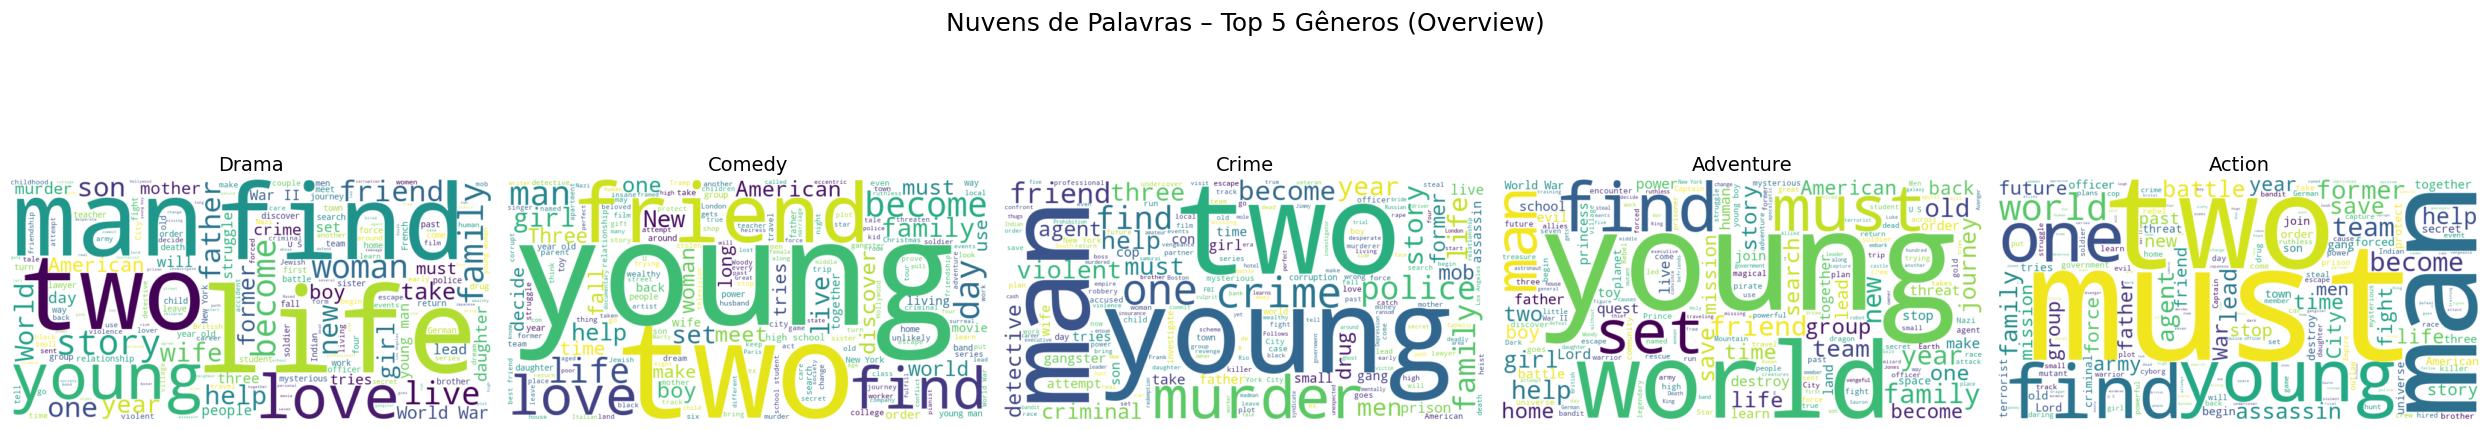

In [30]:
from wordcloud import WordCloud, STOPWORDS

# pegar top 5 gêneros mais frequentes
top_genres = (df['Genre']
              .dropna()
              .str.split(r'[|,/]')
              .explode()
              .str.strip()
              .value_counts()
              .head(5).index)

# gerar wordcloud por gênero
fig, axes = plt.subplots(1, 5, figsize=(25, 6))

for ax, genre in zip(axes, top_genres):
    # juntar todos os textos do gênero
    text = " ".join(df[df['Genre'].str.contains(genre, na=False)]['Overview'].dropna())
    
    # gerar a nuvem
    wc = WordCloud(width=800, height=400,
                   background_color="white",
                   stopwords=STOPWORDS,
                   colormap="viridis").generate(text)
    
    # plotar
    ax.imshow(wc, interpolation="bilinear")
    ax.set_title(f"{genre}", fontsize=14)
    ax.axis("off")

plt.suptitle("Nuvens de Palavras – Top 5 Gêneros (Overview)", fontsize=18, y=0.95)
plt.tight_layout()
plt.show()


Foram geradas nuvens de palavras (WordClouds) para os **Top 5 gêneros** mais frequentes no dataset, com extração das **três palavras mais recorrentes** em cada caso. O objetivo foi identificar padrões narrativos nos resumos (`Overview`) que possam estar associados aos gêneros.

#### Resultados
- **Drama**: termos mais frequentes: *life, man, two*.  
  destaque para histórias de vida, relações interpessoais e dilemas humanos.  
- **Comedy**: termos mais frequentes: *friend, young, two*.  
  presença de personagens jovens, amizades e situações leves/relacionais.  
- **Crime**: termos mais frequentes: *murder, young, woman*.  
  forte associação com investigações, violência e personagens em papéis de vítimas ou criminosos.  
- **Action**: termos mais frequent: *must, two, young*.  
  narrativas centradas em missões, lutas e protagonismo de heróis/antagonistas.  
- **Romance**: termos mais frequentes: *love, young, man*.  
  foco em relações amorosas, juventude e personagens masculinos em destaque.

A análise confirma que a coluna `Overview` contém **elementos textuais característicos de cada gênero**.  

Assim, além de permitir visualizações interpretativas (WordClouds), ela também pode servir como insumo para **modelos de classificação de gênero a partir de descrições textuais**, como **técnicas de Processamento de Linguagem Natural (NLP)**.

## 3. Modelo Preditivo

Definição das variáveis preditoras e a variável alvo.

In [31]:
num_cols = ['Released_Year','Runtime','Meta_score','No_of_Votes','Gross']
cat_cols = ['Certificate','Genre','Director','Star1','Star2','Star3','Star4']

X = df[num_cols + cat_cols].copy()
y = df['IMDB_Rating'].copy()
base = pd.concat([X, y], axis=1).dropna()
X = base[num_cols + cat_cols]
y = base['IMDB_Rating']

Como as variáveis são de naturezas diferentes, utilizou-se um ColumnTransformer para aplicar transformações específicas:
- Numéricas: padronização com StandardScaler, de modo que todas fiquem na mesma escala.
- Categóricas: codificação OneHotEncoder, transformando categorias em variáveis binárias.

In [32]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=True), cat_cols),
    ]
)

Os dados foram separados em:
- Treino (70%): usado para ajuste dos modelos
- Teste (30%): usado apenas para validação final do desempenho.

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

Após o pré-processamento, foram treinados três algoritmos de regressã:
- Random Forest
- XGBoost
- CatBoost

Foi utilizada validação cruzada com 5 folds (KFold), garantindo uma avaliação mais robusta e reduzindo o viés causado por uma única divisão treino-teste.

Por fim, para cada modelo, foram calculadas duas métricas principais:
- R² (coeficiente de determinação): mede a proporção da variância explicada pelo modelo.
- RMSE (Root Mean Squared Error): mede o erro médio de previsão em relação à escala da variável alvo.

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

models = {
    "RandomForest": RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1),
    "XGBoost": XGBRegressor(
        n_estimators=500, learning_rate=0.05, max_depth=6,
        subsample=0.8, colsample_bytree=0.8, random_state=42,
        n_jobs=-1, tree_method="hist", eval_metric="rmse"
    ),
    "CatBoost": CatBoostRegressor(
        iterations=500, depth=6, learning_rate=0.05,
        loss_function="RMSE", random_state=42, verbose=0
    ),
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)
base_result = []

for name, mdl in models.items():
    pipe = Pipeline([('prep', preprocess), ('model', mdl)])
    r2   = cross_val_score(pipe, X_train, y_train, cv=kf, scoring='r2')
    rmse = -cross_val_score(pipe, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')
    base_result.append({
        'Modelo': name,
        'R2_cv':  np.mean(r2),
        'RMSE_cv': np.mean(rmse)
    })

print(pd.DataFrame(base_result).sort_values('RMSE_cv'))

         Modelo     R2_cv   RMSE_cv
2      CatBoost  0.502402  0.185793
1       XGBoost  0.482415  0.188543
0  RandomForest  0.455276  0.193473


**Fine Tunning**
Após o treinamento inicial, os modelos foram ajustados através dos hiperparâmetros.

In [35]:
from sklearn.model_selection import RandomizedSearchCV

rf_pipe = Pipeline([('prep', preprocess),
                    ('model', RandomForestRegressor(random_state=42, n_jobs=-1))])

rf_space = {
    'model__n_estimators': [200, 300, 400, 600],
    'model__max_depth': [None, 8, 12, 16, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['sqrt', 'log2', None]
}

rf_search = RandomizedSearchCV(
    rf_pipe, rf_space, n_iter=25, cv=5, scoring='neg_root_mean_squared_error',
    random_state=42, n_jobs=-1, verbose=0
)
rf_search.fit(X_train, y_train)
print("RF best params:", rf_search.best_params_)
print("RF best CV RMSE:", -rf_search.best_score_)

RF best params: {'model__n_estimators': 400, 'model__min_samples_split': 2, 'model__min_samples_leaf': 2, 'model__max_features': None, 'model__max_depth': None}
RF best CV RMSE: 0.1898641244388827


In [36]:
xgb_pipe = Pipeline([('prep', preprocess),
                     ('model', XGBRegressor(
                         n_estimators=800, random_state=42, n_jobs=-1,
                         tree_method='hist', eval_metric='rmse'
                     ))])

xgb_space = {
    'model__n_estimators': [400, 600, 800, 1000],
    'model__learning_rate': [0.03, 0.05, 0.08, 0.1],
    'model__max_depth': [4, 6, 8],
    'model__subsample': [0.7, 0.8, 1.0],
    'model__colsample_bytree': [0.7, 0.8, 1.0],
    'model__reg_lambda': [0.5, 1.0, 1.5]
}

xgb_search = RandomizedSearchCV(
    xgb_pipe, xgb_space, n_iter=25, cv=5, scoring='neg_root_mean_squared_error',
    random_state=42, n_jobs=-1, verbose=0
)
xgb_search.fit(X_train, y_train)
print("XGB best params (sem ES):", xgb_search.best_params_)
print("XGB best CV RMSE:", -xgb_search.best_score_)


best_xgb = xgb_search.best_estimator_

X_val_trans = best_xgb.named_steps['prep'].fit_transform(X_train)  
X_test_trans = best_xgb.named_steps['prep'].transform(X_test)
y_tr = y_train.values

best_xgb.set_params(model__early_stopping_rounds=50)
best_xgb.named_steps['model'].fit(
    X_val_trans, y_tr,
    eval_set=[(X_test_trans, y_test.values)],
    verbose=False
)

XGB best params (sem ES): {'model__subsample': 1.0, 'model__reg_lambda': 1.5, 'model__n_estimators': 800, 'model__max_depth': 4, 'model__learning_rate': 0.03, 'model__colsample_bytree': 1.0}
XGB best CV RMSE: 0.18836137367152755


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=800, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [37]:
from catboost import CatBoostRegressor

cb_pipe = Pipeline([('prep', preprocess),
                    ('model', CatBoostRegressor(loss_function='RMSE', random_state=42, verbose=0))])

cb_space = {
    'model__iterations': [400, 600, 800],
    'model__depth': [4, 6, 8],
    'model__learning_rate': [0.03, 0.05, 0.08],
    'model__l2_leaf_reg': [1, 3, 5, 7]
}

cb_search = RandomizedSearchCV(
    cb_pipe, cb_space, n_iter=20, cv=5, scoring='neg_root_mean_squared_error',
    random_state=42, n_jobs=-1, verbose=0
)
cb_search.fit(X_train, y_train)
print("CatBoost best params:", cb_search.best_params_)
print("CatBoost best CV RMSE:", -cb_search.best_score_)

CatBoost best params: {'model__learning_rate': 0.08, 'model__l2_leaf_reg': 5, 'model__iterations': 600, 'model__depth': 6}
CatBoost best CV RMSE: 0.18271303681773104


In [38]:
from sklearn.metrics import r2_score, root_mean_squared_error

cands = {
    'RF': rf_search.best_estimator_,
    'XGB': xgb_search.best_estimator_,
    'CAT': cb_search.best_estimator_
}

res_test = []
for name, pipe in cands.items():
    if name == 'XGB' and hasattr(pipe.named_steps['model'], 'early_stopping_rounds'):
        pipe.set_params(model__early_stopping_rounds=None)

    pipe.fit(X_train, y_train)
    pred = pipe.predict(X_test)
    r2   = r2_score(y_test, pred)
    rmse = root_mean_squared_error(y_test, pred)  
    res_test.append({'Modelo': name, 'R2_test': r2, 'RMSE_test': rmse})

print(pd.DataFrame(res_test).sort_values('RMSE_test'))
best_name = pd.DataFrame(res_test).sort_values('RMSE_test').iloc[0]['Modelo']
print(f"Melhor no teste: {best_name}")
best_pipe = cands[best_name]

  Modelo   R2_test  RMSE_test
2    CAT  0.524839   0.191843
0     RF  0.511557   0.194506
1    XGB  0.507833   0.195246
Melhor no teste: CAT


**Previsão de nota do IMDb do filme 'The Shawshank Redemption'**

In [39]:
filme_dict = {
 'Series_Title': 'The Shawshank Redemption',
 'Released_Year': '1994',
 'Certificate': 'A',
 'Runtime': '142 min',
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': '28,341,469'
}

filme_df = pd.DataFrame([filme_dict])

filme_df['Released_Year'] = filme_df['Released_Year'].astype(int)
filme_df['Runtime'] = filme_df['Runtime'].str.replace(' min','').astype(int)
filme_df['Gross'] = (filme_df['Gross']
                     .astype(str)
                     .str.replace(',','')
                     .astype(float))

# previsao com o CatBoost (modelo selecionado)
X_filme = filme_df[num_cols + cat_cols]
pred = best_pipe.predict(X_filme)[0]

print(f"Nota IMDb prevista para '{filme_df['Series_Title'][0]}': {pred:.1f}")

Nota IMDb prevista para 'The Shawshank Redemption': 8.9


Foi realizada a previsão da nota IMDb para o filme **The Shawshank Redemption**, considerando as seguintes características:  

```python
{
 'Series_Title': 'The Shawshank Redemption',
 'Released_Year': '1994',
 'Certificate': 'A',
 'Runtime': '142 min',
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': '28,341,469'
}

- Nota prevista pelo modelo: 8.9  
- Nota real no IMDb: 9,3  (https://www.imdb.com/pt/title/tt0111161/)

A diferença observada (≈ 0,4 pontos) mostra que o modelo consegue capturar bem os padrões gerais de avaliação.

Salvando o modelo desenvolvido no formato .pkl

In [40]:
import joblib

joblib.dump(best_pipe, "modelo_imdb.pkl")

['modelo_imdb.pkl']

**Teste**

In [41]:
modelo = joblib.load("modelo_imdb.pkl")

filme_dict = {
 'Series_Title': 'The Shawshank Redemption',
 'Released_Year': 1994,
 'Certificate': 'A',
 'Runtime': 142,   # em minutos
 'Genre': 'Drama',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': 28341469
}

filme_df = pd.DataFrame([filme_dict])

pred = modelo.predict(filme_df)[0]
print(f"Nota prevista para {filme_dict['Series_Title']}: {pred:.1f}")

Nota prevista para The Shawshank Redemption: 8.9


### Comentários Gerais do Modelo Preditivo – Previsão da Nota IMDb  

#### Como a previsão foi feita  
A previsão da nota do IMDb foi tratada como um **problema de regressão**, pois o alvo (`IMDB_Rating`) é uma variável contínua.  

- **Variáveis numéricas utilizadas**: `Released_Year`, `Runtime`, `Meta_score`, `No_of_Votes`, `Gross`.  
- **Variáveis categóricas utilizadas**: `Certificate`, `Genre`, `Director`, `Star1`, `Star2`, `Star3`, `Star4`.  
- **Transformações aplicadas**:  
  - Padronização das variáveis numéricas com `StandardScaler`.  
  - Codificação das variáveis categóricas via `One-Hot Encoding`.  
- O conjunto foi dividido em treino (70%) e teste (30%).  

#### Modelos aplicados  
Foram testados três algoritmos de regressão baseados em árvores:  

- **Random Forest Regressor (RF)**  
- **XGBoost Regressor (XGB)**
- **CatBoost Regressor (CAT)** 

Os modelos foram treinados inicialmente com valores padrão e depois ajustados via **RandomizedSearchCV** para busca de melhores hiperparâmetros.  

#### Resultados  
Avaliou-se os modelos com duas métricas:  

- **R²** → mede a proporção da variabilidade da nota explicada pelo modelo (quanto maior, melhor).  
- **RMSE** → erro médio das previsões em pontos na escala IMDb (quanto menor, melhor).  

| Modelo        | R² (teste) | RMSE (teste) |
|---------------|------------|--------------|
| CatBoost      | 0.52       | 0.19         |
| Random Forest | 0.51       | 0.19         |
| XGBoost       | 0.51       | 0.20         |

#### Conclusão  
- O **CatBoost** foi o melhor modelo, com **R² ≈ 0.52** e **RMSE ≈ 0.19**, conseguindo explicar pouco mais de 50% da variação da nota IMDb, com erro médio inferior a 0.2 pontos.  
- **Prós**: maior precisão, bom tratamento de variáveis categóricas e robustez.  
- **Contras**: maior custo computacional comparado ao Random Forest (modelo com o 2° melhor desempenho).  
- A métrica escolhida como principal foi o **RMSE**, por ser interpretável diretamente na escala de notas do IMDb.
